In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout
from numpy import dstack
from sklearn.linear_model import LogisticRegression
     


2023-04-10 23:08:56.945794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
df = pd.read_csv('Churn_Modelling.csv')

In [11]:


df.head()
     
#This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:


df.info()
     
#There are 3 features with string values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.isnull().sum()

#Dataset is free of null values.


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df['Geography'].value_counts()

#Since the number of countries is less and also their is no rank which can be associated with the customers of different region. Hence we use one hot encodding.

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
#One hot encodding
geo = pd.get_dummies(df['Geography'],drop_first = True)
gen = pd.get_dummies(df['Gender'],drop_first= True)
df = pd.concat([df,gen,geo],axis=1)


#One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning.

In [17]:
#Drop unnecessary data
df.drop(['Geography','Gender','Surname','RowNumber','CustomerId'],axis=1,inplace = True)
     

In [18]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [19]:
#We need to do data normalization before we send the data to train a neural network model.

from sklearn.preprocessing import MinMaxScaler

In [20]:


X = df.drop('Exited',axis=1)
y = df['Exited']
     


In [21]:
#normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 0.        ,
        0.        ],
       [0.844     , 0.32432432, 0.3       , ..., 1.        , 1.        ,
        0.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
pd.DataFrame( )

""


In [24]:
X_final = pd.DataFrame(columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain'],data = X_scaled)

In [25]:
X_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0


In [26]:
#train-test-split
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size = 0.30,random_state = 101)

In [27]:
#Modeling

#Lets create 3 neural networks to stack sequentially further.




model1 = Sequential()
model1.add(Dense(50,activation = 'relu',input_dim = 11))
model1.add(Dense(25,activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))
     


2023-04-10 23:18:53.189122: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model1.summary()


# Output shape: N-D tensor with shape: (batch_size, ..., units). For instance, for a 2D input with shape (batch_size, input_dim), the output would have shape (batch_size, units).

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [29]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [30]:


#We will chose f_score

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [31]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history = model1.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4893 - f1_m: 0.0272 - val_loss: 0.4614 - val_f1_m: 0.1511
Epoch 2/100
219/219 [==============================] - 0s 972us/step - loss: 0.4494 - f1_m: 0.1347 - val_loss: 0.4385 - val_f1_m: 0.1787
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4341 - f1_m: 0.2153 - val_loss: 0.4287 - val_f1_m: 0.3454
Epoch 4/100
219/219 [==============================] - 0s 957us/step - loss: 0.4247 - f1_m: 0.2865 - val_loss: 0.4262 - val_f1_m: 0.4099
Epoch 5/100
219/219 [==============================] - 0s 952us/step - loss: 0.4148 - f1_m: 0.3288 - val_loss: 0.4060 - val_f1_m: 0.4321
Epoch 6/100
219/219 [==============================] - 0s 974us/step - loss: 0.3997 - f1_m: 0.3727 - val_loss: 0.3915 - val_f1_m: 0.4770
Epoch 7/100
219/219 [==============================] - 0s 933us/step - loss: 0.3834 - f1_m: 0.4266 - val_loss: 0.3713 - val_f1_m: 0.4946
Epoch 8/100
219/219 [========================

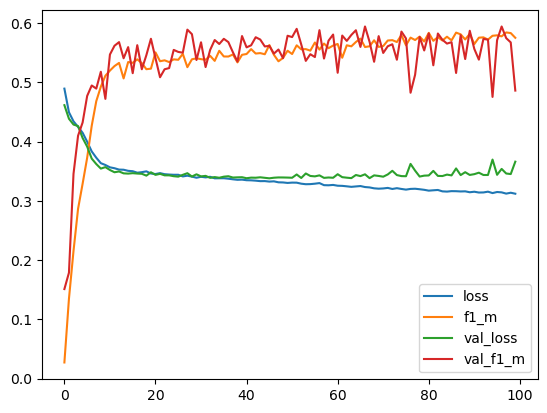

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [33]:
#Lets save the model.

model1.save('model1.h5')

In [34]:
# Train 2 more different models.

model2 = Sequential()
model2.add(Dense(25,activation = 'relu',input_dim = 11))
model2.add(Dense(25,activation = 'relu'))
model2.add(Dense(10,activation = 'relu'))
model2.add(Dense(1,activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history1 = model2.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)
     


Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.5112 - f1_m: 0.0174 - val_loss: 0.4676 - val_f1_m: 0.0035
Epoch 2/100
219/219 [==============================] - 0s 950us/step - loss: 0.4604 - f1_m: 0.0560 - val_loss: 0.4536 - val_f1_m: 0.1129
Epoch 3/100
219/219 [==============================] - 0s 982us/step - loss: 0.4457 - f1_m: 0.1779 - val_loss: 0.4336 - val_f1_m: 0.2370
Epoch 4/100
219/219 [==============================] - 0s 943us/step - loss: 0.4302 - f1_m: 0.2794 - val_loss: 0.4189 - val_f1_m: 0.3309
Epoch 5/100
219/219 [==============================] - 0s 968us/step - loss: 0.4183 - f1_m: 0.3373 - val_loss: 0.4036 - val_f1_m: 0.4182
Epoch 6/100
219/219 [==============================] - 0s 974us/step - loss: 0.3994 - f1_m: 0.3915 - val_loss: 0.3802 - val_f1_m: 0.4463
Epoch 7/100
219/219 [==============================] - 0s 937us/step - loss: 0.3785 - f1_m: 0.4474 - val_loss: 0.3659 - val_f1_m: 0.4458
Epoch 8/100
219/219 [======================

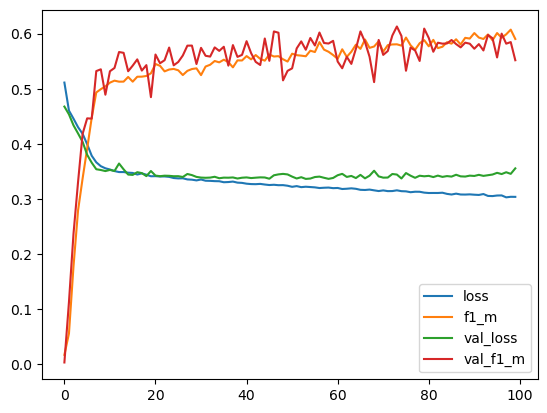

In [35]:


plt.plot(history1.history['loss'])
plt.plot(history1.history['f1_m'])
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()
     


In [36]:
model2.save('model2.h5')

In [37]:
model3 = Sequential()
model3.add(Dense(50,activation = 'relu',input_dim = 11))
model3.add(Dense(25,activation = 'relu'))
model3.add(Dense(25,activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(Dense(10,activation = 'relu'))
model3.add(Dense(1,activation = 'sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history3 = model3.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4871 - f1_m: 0.0000e+00 - val_loss: 0.4585 - val_f1_m: 0.0000e+00
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4511 - f1_m: 0.0677 - val_loss: 0.4299 - val_f1_m: 0.1867
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4276 - f1_m: 0.2767 - val_loss: 0.4126 - val_f1_m: 0.4280
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4130 - f1_m: 0.3587 - val_loss: 0.3984 - val_f1_m: 0.3790
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4030 - f1_m: 0.4242 - val_loss: 0.3816 - val_f1_m: 0.4537
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3816 - f1_m: 0.4641 - val_loss: 0.3599 - val_f1_m: 0.5354
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3664 - f1_m: 0.4761 - val_loss: 0.3520 - val_f1_m: 0.5261
Epoch 8/100
219/219 [==========================

In [38]:
model3.save('model3.h5')

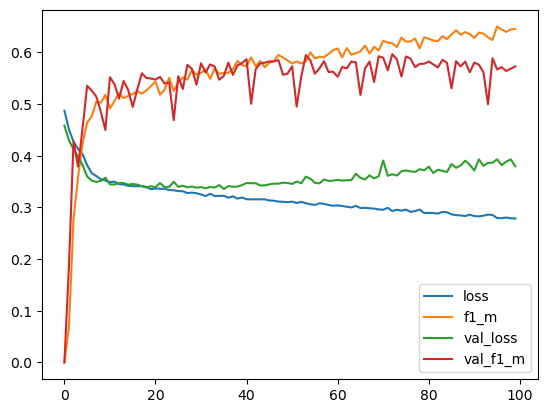

In [42]:


plt.plot(history3.history['loss'])
plt.plot(history3.history['f1_m'])
plt.plot(history3.history['val_loss'])
plt.plot(history3.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()
     

In [40]:
model4 = Sequential()
model4.add(Dense(50,activation = 'relu',input_dim = 11))
model4.add(Dense(25,activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(10,activation = 'relu'))
model4.add(Dense(1,activation = 'sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history4 = model4.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.5057 - f1_m: 0.0032 - val_loss: 0.4758 - val_f1_m: 0.0000e+00
Epoch 2/100
219/219 [==============================] - 0s 995us/step - loss: 0.4669 - f1_m: 0.0000e+00 - val_loss: 0.4533 - val_f1_m: 0.0000e+00
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4443 - f1_m: 0.1214 - val_loss: 0.4340 - val_f1_m: 0.3336
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4256 - f1_m: 0.2807 - val_loss: 0.4040 - val_f1_m: 0.3575
Epoch 5/100
219/219 [==============================] - 0s 990us/step - loss: 0.4073 - f1_m: 0.3437 - val_loss: 0.3829 - val_f1_m: 0.4612
Epoch 6/100
219/219 [==============================] - 0s 986us/step - loss: 0.3886 - f1_m: 0.4331 - val_loss: 0.3626 - val_f1_m: 0.5087
Epoch 7/100
219/219 [==============================] - 0s 998us/step - loss: 0.3742 - f1_m: 0.4718 - val_loss: 0.3650 - val_f1_m: 0.4453
Epoch 8/100
219/219 [==============

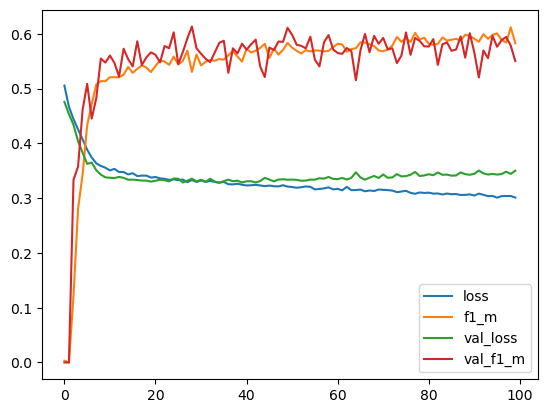

In [41]:


plt.plot(history4.history['loss'])
plt.plot(history4.history['f1_m'])
plt.plot(history4.history['val_loss'])
plt.plot(history4.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()
     


In [43]:
model4.save('model4.h5')

In [44]:


dependencies = {
    'f1_m': f1_m
}

     


In [49]:
# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'model' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename,custom_objects=dependencies)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [50]:
n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded model1.h5
>loaded model2.h5
>loaded model3.h5
>loaded model4.h5
Loaded 4 models


In [51]:

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat #
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX
     

In [52]:

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression() #meta learner
	model.fit(stackedX, inputy)
	return model

In [53]:
model = fit_stacked_model(members, X_test,y_test)

In [56]:

# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [57]:

# evaluate model on test set
yhat = stacked_prediction(members, model, X_test)
score = f1_m(y_test/1.0, yhat/1.0)
print('Stacked F Score:', score)

Stacked F Score: tf.Tensor(0.5890546790786404, shape=(), dtype=float64)


In [58]:
from sklearn.metrics import f1_score

In [ ]:
i = 0
for model in members:
    i+=1
    pred = model.predict(X_test)
    score = f1_score(y_test,pred)
    print('F-Score of model {} is '.format(i),score)

In [ ]:
#F-Score of model 1 is  0.5901328273244781
#F-Score of model 2 is  0.5849802371541502
#F-Score of model 3 is  0.5935483870967743
#F-Score of model 4 is  0.5987144168962351
#Stacked Model give f1 score of 0.6007 which is higher than any other model taken alone.
